Investigating combined LEE for 2 searches with N*M bins.
Compare:
  * combined with Bonforoni LEE correction
  * combined with proper LEE correction
  * use run1 to tell where to look in run2
  
See: http://www.science20.com/a_quantum_diaries_survivor/the_750_gev_diphoton_bump_what_it_cannot_be-162715

In [1]:
%pylab inline --no-import-all
from scipy.stats import chi2, norm

Populating the interactive namespace from numpy and matplotlib


In [31]:
N=50
M=1
Nexpt=10000
run0 = np.random.normal(0,1,N*M*Nexpt).reshape(Nexpt,N*M)
run1 = np.random.normal(0,1,N*M*Nexpt).reshape(Nexpt,N*M)

In [32]:
comb = (run0+run1)/np.sqrt(2.)
maxcomb = np.max(comb,axis=1)

In [33]:
maxindex0 = np.argmax(run0,axis=1)
maxindex1 = np.argmax(run1,axis=1)
maxcombindex = np.argmax(comb,axis=1)

In [34]:
maxrun0 = np.max(run0, axis=1)
peekrun1 = run1[np.arange(Nexpt),maxindex0]

In [35]:
1.*np.sum(maxcombindex==maxindex0)/Nexpt, 1.*np.sum(maxcombindex==maxindex1)/Nexpt

(0.2819, 0.2742)

In [36]:
run0[np.arange(Nexpt,dtype=np.int32),maxindex0] - maxrun0

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

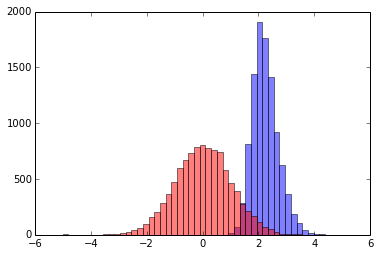

In [37]:
cont,bins,patches = plt.hist(maxrun0,bins=np.linspace(-5,5,50), alpha=0.5)
cont,bins,patches = plt.hist(peekrun1,bins=bins, color='r', alpha=0.5)

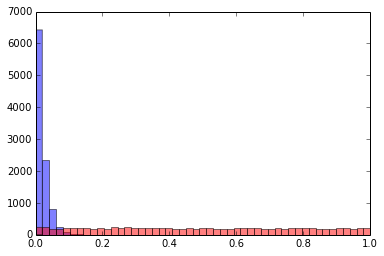

In [38]:
cont,bins,patches = plt.hist(norm.sf(maxrun0),bins=np.linspace(0,1,50), alpha=0.5)
cont,bins,patches = plt.hist(norm.sf(peekrun1),bins=bins, color='r', alpha=0.5)

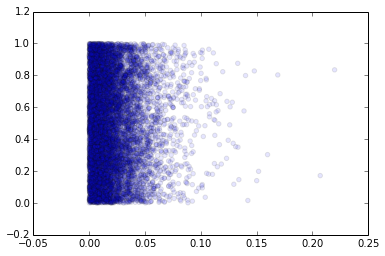

In [39]:
plt.scatter(norm.sf(maxrun0),norm.sf(peekrun1), alpha=0.1)

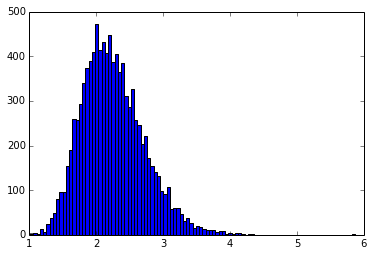

In [40]:
maxcomb_cont, maxcomb_bins, patches = plt.hist(maxcomb, bins=100)

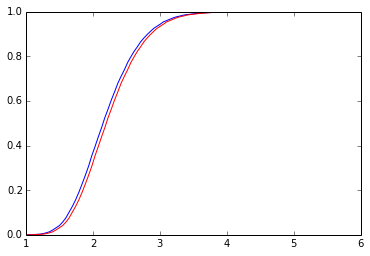

In [41]:
def maxcomb_globalp(z):
    return 1.*np.sum(maxcomb>z)/Nexpt

def maxcomb_globalp_array(zarray):
    temp = zarray*0.
    for i, z in enumerate(zarray):
        temp[i] = 1.-1.*np.sum(maxcomb>z)/Nexpt
    return temp


maxcomb_cdf = np.cumsum(maxcomb_cont)/Nexpt
maxcomb_global = norm.ppf(maxcomb_globalp_array(maxcomb))
plt.plot(maxcomb_bins[:-1],maxcomb_cdf)
plt.plot(maxcomb_bins,maxcomb_globalp_array(maxcomb_bins),c='r')

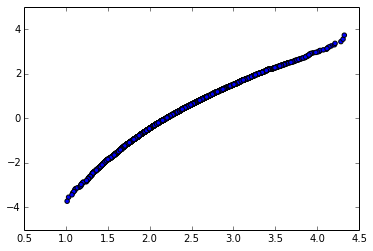

In [59]:
plt.scatter(maxcomb,maxcomb_global)

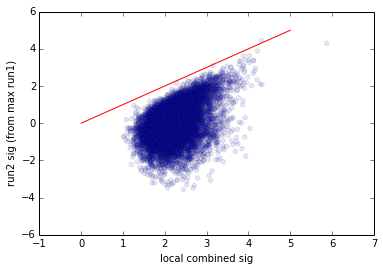

In [43]:
plt.scatter(maxcomb,peekrun1, alpha=0.1)
plt.plot([0,5],[0,5], c='r')
plt.xlabel('local combined sig')
plt.ylabel('run2 sig (from max run1)')

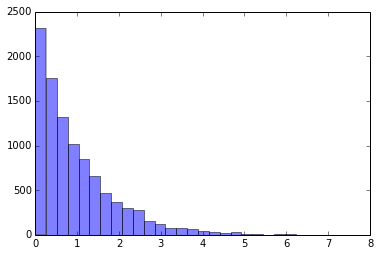

In [44]:
_ = plt.hist(norm.sf(maxcomb)*N*M , bins=30, alpha=0.5)

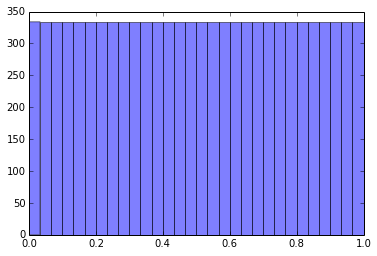

In [45]:
_ = plt.hist(norm.sf(maxcomb_global) , bins=30, alpha=0.5)

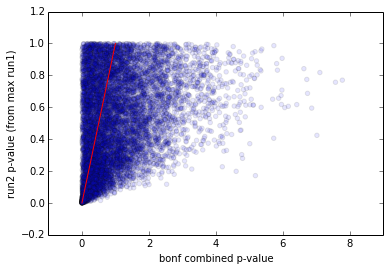

In [46]:
_ = plt.scatter(norm.sf(maxcomb)*N*M, norm.sf(peekrun1), alpha=0.1)
plt.plot([0,1],[0,1], c='r')
plt.xlabel('bonf combined p-value')
plt.ylabel('run2 p-value (from max run1)')

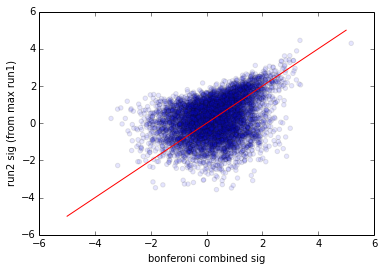

In [47]:
_ = plt.scatter(-norm.ppf(norm.sf(maxcomb)*N*M), peekrun1, alpha=0.1)
plt.plot([-5,5],[-5,5], c='r')
plt.xlabel('bonferoni combined sig')
plt.ylabel('run2 sig (from max run1)')

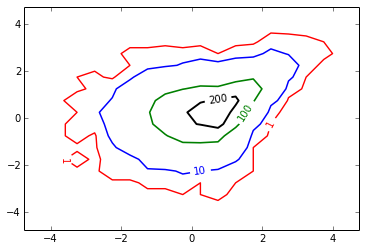

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
H, xedges, yedges = np.histogram2d(-norm.ppf(norm.sf(maxcomb)*N*M), peekrun1, range=[[-5,5],[-5,5]], bins=(20, 20))
extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
#subplots_adjust(bottom=0.15, left=0.15)
levels = (2.0e2, 1.0e2, 1.0e1, 1.0e0)
cset = plt.contour(H, levels, origin='lower',colors=['black','green','blue','red'],linewidths=(1.9, 1.6, 1.5, 1.4),extent=extent)
plt.clabel(cset, inline=1, fontsize=10, fmt='%1.0i')
for c in cset.collections:
    c.set_linestyle('solid')

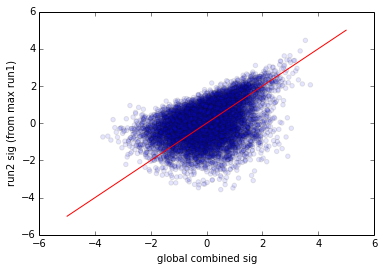

In [49]:
_ = plt.scatter(maxcomb_global, peekrun1, alpha=0.1)
plt.plot([-5,5],[-5,5], c='r')
plt.xlabel('global combined sig')
plt.ylabel('run2 sig (from max run1)')

(6274,)


0.048200373784184992

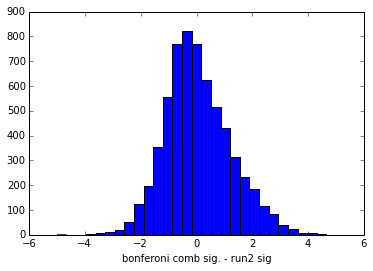

In [50]:
sigdiff = (-norm.ppf(norm.sf(maxcomb)*N*M) - peekrun1)
#sigdiff = sigdiff[peekrun1>0]
#print sigdiff.shape
sigdiff = sigdiff[~numpy.isnan(sigdiff)]
print sigdiff.shape
_ = plt.hist(sigdiff, bins=np.linspace(-5,5,30))
plt.xlabel('bonferoni comb sig. - run2 sig')
np.mean(sigdiff)

inf

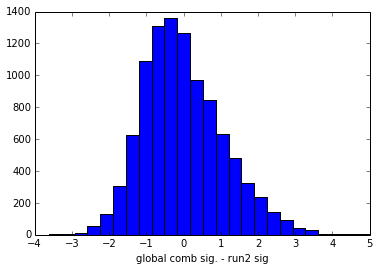

In [51]:
_ = plt.hist(maxcomb_global-peekrun1, bins=np.linspace(-5,5,30))
plt.xlabel('global comb sig. - run2 sig')
np.mean(maxcomb_global-peekrun1)

In [52]:
np.sum(np.isinf(maxcomb_global)),np.sum(np.isinf(peekrun1))

(1, 0)

In [53]:
maxcomb_globalp(3.)

0.0664

In [57]:
-norm.ppf(norm.sf(3)*N*M)

1.4947113028449313

How does Prob(maxcomb_index=maxindex0) depend on maxrun0 and/or maxcomb?

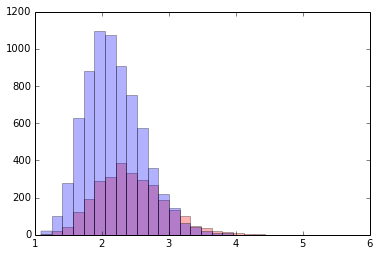

In [54]:
conteq, binseq,patches = plt.hist(maxcomb[maxcombindex==maxindex0],bins=30, alpha=0.3, color='r')
contneq, binsneq,patches = plt.hist(maxcomb[maxcombindex!=maxindex0],bins=binseq,alpha=0.3, color='b')

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


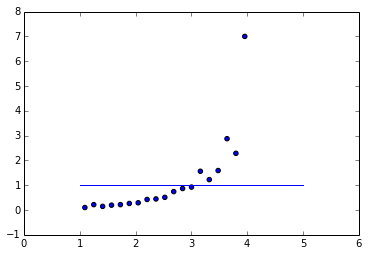

In [55]:
plt.scatter(binseq[:-1],conteq/contneq)
plt.plot([1,5],[1,1])

How does difference between maxcomb_global and peekrun1 depend on maxcomb_global or peekrun1

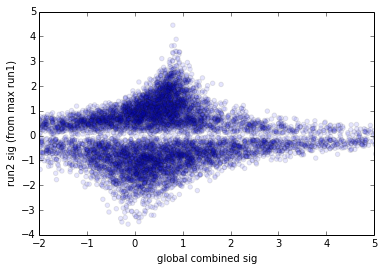

In [56]:
_ = plt.scatter(maxcomb_global/peekrun1, peekrun1, alpha=0.1)
plt.xlim(-2,5)
plt.xlabel('global combined sig')
plt.ylabel('run2 sig (from max run1)')

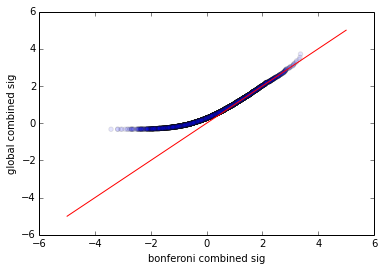

In [58]:
_ = plt.scatter(-norm.ppf(norm.sf(maxcomb)*N*M), maxcomb_global, alpha=0.1)
plt.plot([-5,5],[-5,5], c='r')
plt.xlabel('bonferoni combined sig')
plt.ylabel('global combined sig')

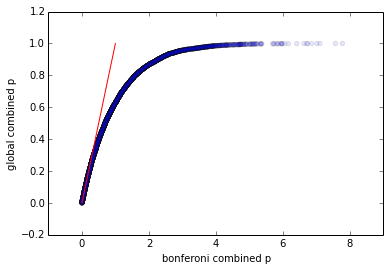

In [61]:
_ = plt.scatter(norm.sf(maxcomb)*N*M, norm.sf(maxcomb_global), alpha=0.1)
plt.plot([0,1],[0,1], c='r')
plt.xlabel('bonferoni combined p')
plt.ylabel('global combined p')